# Calibration of AIRDOS CF

In [33]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import glob
import matplotlib.pyplot as plt
import glob

In [34]:
#fto = './TEMPCALIB/DATALOG2.TXT' #  File to Open
fto = '/storage/experiments/2019/10_AIRDOS-CF_thermal_calibration/DATALOG.TXT' #  File to Open

l=[]
l.extend(range(0,259))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*')
df.reset_index(inplace=True)

df.drop(df[df[0]=='$GPTXT'].index, inplace=True)
#df.drop(r[r[0]=='$GPRMC'].index, inplace=True)
df.drop(df[df[0]=='$GPVTG'].index, inplace=True)
df.drop(df[df[0]=='$GPGLL'].index, inplace=True)
df.drop(df[df[0]=='$GPGSA'].index, inplace=True)
df.drop(df[df[0]=='$GPGSV'].index, inplace=True)
#df.drop(df[df[0]=='$CANDY'].index, inplace=True)


/nix/store/7c1yg0i1vzl938z7nvw03sf28bqzg373-python3.7-ipython-7.12.0/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Plot Temperature

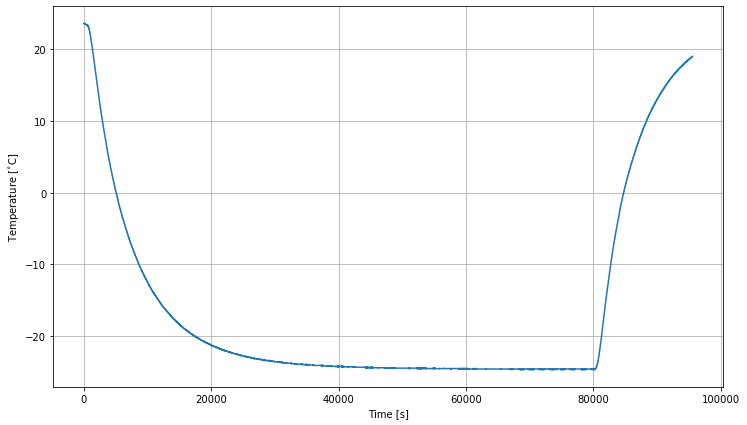

In [35]:
rc = df.loc[df.iloc[:,1]=='$CANDY']
rc.reset_index(drop=True, inplace=True)
rc = rc.apply(pd.to_numeric, errors='coerce')
#df.reset_index(inplace=True)

plt.figure(figsize=(12,7))

plt.plot(rc[2],rc[5])
plt.xlabel('Time [s]')
plt.ylabel(r'Temperature [$^{\circ}$C]')
plt.grid()

# Plot Spectra

(50, 260)
(50, 260)
(50, 260)
(50, 260)


Text(0.5, 1.0, '$^2$$^2$Na (511 keV, 1275 keV)')

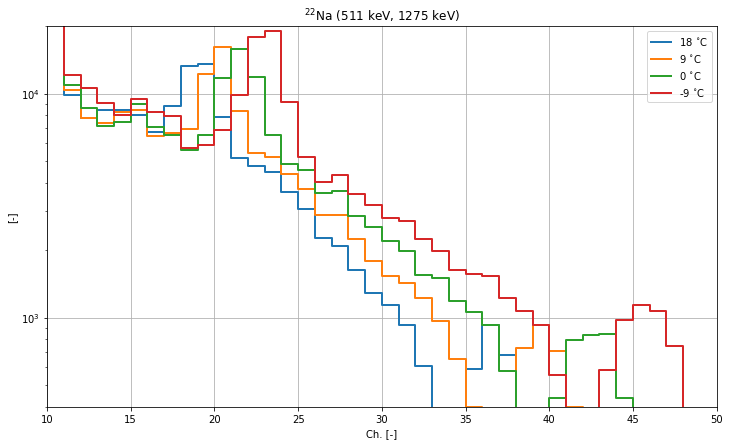

In [39]:
### rc = df.loc[df.iloc[:,1]=='$CANDY']
rc.reset_index(drop=True, inplace=True)
rc = rc.apply(pd.to_numeric, errors='coerce')

ener = pd.Series('') 

LOW_ENERGY = 10

#temp = [18, 15, 10, 5, 0, -2, -5]
#temp = [23, 0, -23]
temp = [18, 9, 0, -9]

for t in range(len(temp)):     
    ener[t] = rc.loc[rc[5]>temp[t]].loc[rc[5]<temp[t]+1][:50].sum()
    print(rc.loc[rc[5]>temp[t]].loc[rc[5]<temp[t]+1][:50].shape)

plt.figure(figsize=(12,7))
plt.yscale('log')
plt.ylim(400,20000)
plt.xlim(10,50)

for t in range(len(temp)):     
    plt.plot(ener[t][3:], label=str(temp[t])+r' $^{\circ}$C', lw=2, drawstyle='steps-pre')
plt.grid()
plt.legend()
plt.xlabel('Ch. [-]')
plt.ylabel('[-]')
plt.title(r'$^2$$^2$Na (511 keV, 1275 keV)')

In [111]:
#ener[0].reset_index(inplace=True)
#ener[0]
#rc.reset_index()
#df.loc[df.iloc[:,2]=='$CANDY']
#rc
tt = -4.7
#rc.loc[rc[5]>=tt].loc[rc[5]<tt+0.5]#[:10]
rc.loc[rc[5]<=tt][:50]


,level_0,index,0,1,2,3,4,5,6,7,...,249,250,251,252,253,254,255,256,257,258
1039,3731,3731,NaN,1039,10172,0.0,99870.00,-4.75,0,1680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1040,3745,3745,NaN,1040,10185,0.0,99869.25,-4.75,0,1690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1041,3746,3746,NaN,1041,10194,2.0,99868.75,-4.75,0,1648,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1042,3747,3747,NaN,1042,10203,0.0,99870.00,-4.75,0,1647,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1043,3748,3748,NaN,1043,10212,1.0,99872.00,-4.75,0,1696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1044,3749,3749,NaN,1044,10221,1.0,99868.50,-4.81,0,1672,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1045,3763,3763,NaN,1045,10233,3.0,99866.50,-4.81,0,1677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1046,3764,3764,NaN,1046,10242,3.0,99868.50,-4.81,0,1674,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1047,3765,3765,NaN,1047,10251,3.0,99870.00,-4.81,0,1704,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1048,3766,3766,NaN,1048,10260,2.0,99868.50,-4.81,0,1674,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(50, 260)
(50, 260)
(50, 260)


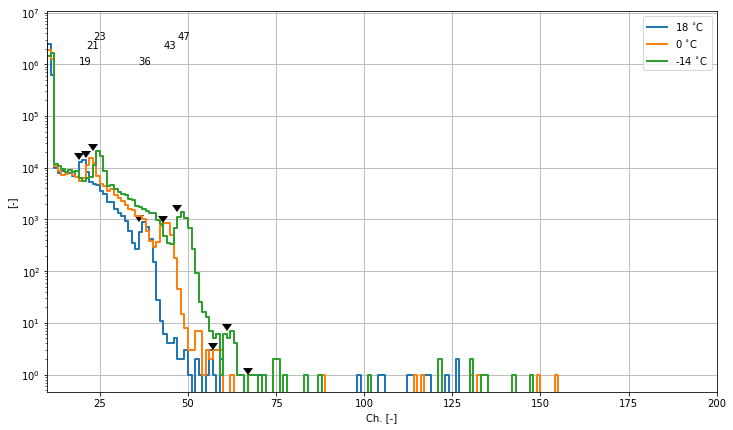

In [25]:
%matplotlib inline
#%matplotlib notebook
from scipy.signal import find_peaks

rc = df.loc[df.iloc[:,1]=='$CANDY']
rc.reset_index(drop=True, inplace=True)
rc = rc.apply(pd.to_numeric, errors='coerce')

ener = pd.Series('') 
peaks = pd.Series('') 

LOW_ENERGY = 10

#temp = [18, 15, 10, 5, 0, -2, -5]
temp = [18, 0, -14]

for t in range(len(temp)):     
    ener[t] = rc.loc[rc[5]>temp[t]-0.5].loc[rc[5]<temp[t]+0.5][:50].sum()
    print(rc.loc[rc[5]>temp[t]-0.5].loc[rc[5]<temp[t]+0.5][:50].shape)
    peaks[t] = find_peaks(ener[t], width=2.1)

plt.figure(figsize=(12,7))
plt.yscale('log')
plt.xlim(10,200)

for t in range(len(temp)):     
    plt.plot(ener[t][2:], label=str(temp[t])+r' $^{\circ}$C', lw=2, drawstyle='steps-post')
    plt.plot((peaks[t][0]-2).tolist(),ener[t][peaks[t][0].tolist()], ls='', marker=7, ms=10, markeredgewidth=0, color='black')
    for i in range(2):     
        try:
            plt.text((peaks[t][0][i]-2),1e6*(t+1),str(peaks[t][0][i]-2))
        except:
            pass
    
plt.grid()
plt.legend()
plt.xlabel('Ch. [-]')
plt.ylabel('[-]')

None

In [80]:
for t in range(len(temp)): 
    print('temp:',temp[t])
    print(peaks[t][0][0]-2, peaks[t][0][1]-2)
    l = np.array([[peaks[t][0][0]-13, 1],[peaks[t][0][1]-13,1]])
    r = np.array([0.511, 1.275])

    coef = np.linalg.solve(l,r)
    print(coef[0], coef[1])


temp: 18
20 37
0.04494117647058823 0.106529411764706
temp: 0
22 44
0.034727272727272725 0.12899999999999995
temp: -14
24 48
0.03183333333333333 0.0971666666666667


# Find time pattern

In [62]:
pat = [2,3,3,2,0]
rc.loc[rc[3].eq(pat[0]) & rc[3].shift(-1).eq(pat[1]) & \
       rc[3].shift(-2).eq(pat[2]) & rc[3].shift(-3).eq(pat[3]) &\
       rc[3].shift(-4).eq(pat[4])]
None

In [58]:
peaks[0]

(array([22, 39]),
 {'prominences': array([15354.,  1164.]),
  'left_bases': array([19, 37]),
  'right_bases': array([54, 54]),
  'widths': array([2.16578401, 2.60252922]),
  'width_heights': array([15101.,   986.]),
  'left_ips': array([20.48774455, 38.17094017]),
  'right_ips': array([22.65352856, 40.77346939])})